## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Parallel experiments

Explore the search space of hyperparameters with parallel multiple runs of ExMAS

Merge the results into single DataFrame and visualize

In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

In [4]:
from ExMAS.experiments import experiment
from dotmap import DotMap

### create the search space

In [5]:
def my_search_space():
    # sspace to explore
    full_space = DotMap()
    full_space.nP = [100, 200, 300, 400]
    full_space.shared_discount = [0.2, 0.25, 0.3]
    full_space.horizon = [60, 300,  1200, -1]
    return full_space

### run

In [6]:
help(experiment)

Help on function experiment in module ExMAS.experiments:

experiment(space=None, config='ExMAS/data/configs/default.json', workers=-1, replications=1)
    Explores the search space `space` starting from base configuration from `config` using `workers` parallel threads`
    :param space:
    :param config:
    :param workers:
    :param replications:
    :return: set of csvs in 'data/results`



In [7]:
experiment(space=my_search_space(), config = 'ExMAS/data/configs/default.json', workers = 4) # explores the search space

Search space to explore of dimensions [4, 3, 4] and total size of 48
city_Delft_Netherlands_nP_100_shareddiscount_02_horizon_60_dt_0_days_000000838796_searchspace_206 2020-07-03 14:16:59.414513 done
city_Delft_Netherlands_nP_100_shareddiscount_02_horizon_1_dt_0_days_000001416267_searchspace_281 2020-07-03 14:17:00.138944 done
city_Delft_Netherlands_nP_100_shareddiscount_02_horizon_300_dt_0_days_000001157463_searchspace_267 2020-07-03 14:17:00.771407 done
city_Delft_Netherlands_nP_100_shareddiscount_025_horizon_60_dt_0_days_000000819583_searchspace_230 2020-07-03 14:17:01.161631 done
city_Delft_Netherlands_nP_100_shareddiscount_03_horizon_300_dt_0_days_000002183074_searchspace_510 2020-07-03 14:17:01.212103 done
city_Delft_Netherlands_nP_100_shareddiscount_025_horizon_1200_dt_0_days_000002340803_searchspace_458 2020-07-03 14:17:01.240456 done
city_Delft_Netherlands_nP_100_shareddiscount_02_horizon_1200_dt_0_days_000001391498_searchspace_274 2020-07-03 14:17:02.448713 done
city_Delft_Net

### process the results:

In [5]:
results = ExMAS.utils.merge_csvs(None, 'ExMAS/data/results/*.csv"', to_numeric = True)

ValueError: No objects to concatenate

In [9]:
results = ExMAS.utils.make_KPIs(results, params = ExMAS.utils.get_config('ExMAS/data/configs/default.json'))

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('ggplot')

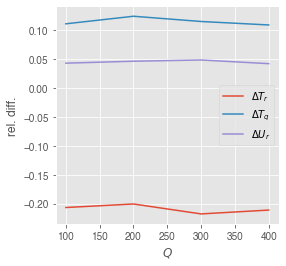

In [11]:
tp = results[(results.horizon == -1) 
       & (results.shared_discount == 0.3)
       & (results.nP >0)]
_ = ExMAS.utils.plot_paper_multi(tp, x = '$Q$', 
                 ys = ['$\Delta T_r$', '$\Delta T_q$', '$\Delta U_r$'], figname = '1_1.svg', y_label = 'rel. diff.', path = '')

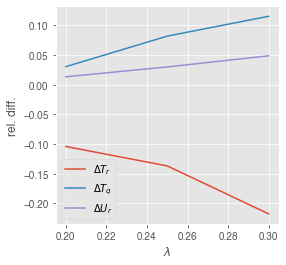

In [12]:
tp = results[(results.horizon == -1) 
       & (results.nP ==300)]
_ = ExMAS.utils.plot_paper_multi(tp, x = '$\lambda$', 
                 ys = ['$\Delta T_r$', '$\Delta T_q$', '$\Delta U_r$'], figname = '1_1.svg', y_label = 'rel. diff.', path = '')

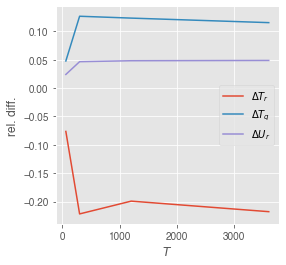

In [13]:
tp = results[(results.shared_discount == 0.3)
       & (results.nP ==300)]
_ = ExMAS.utils.plot_paper_multi(tp, x = '$T$', 
                 ys = ['$\Delta T_r$', '$\Delta T_q$', '$\Delta U_r$'], figname = '1_1.svg', y_label = 'rel. diff.', path = '')

---
(c) Rafał Kucharski, Delft, 2020